# Probability Distribution by setting Min, Most-Likely and Max Values
https://numpy.org/doc/stable/reference/random/generator.html  Provides a lists of different types of distributions<br>
https://www.tutorialspoint.com/generating-random-number-list-in-python Code of how to randomly sample

In [1]:
# Basic libraries and global styles
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top


## Set minimum, most-likely and maximum values for all distributions
- **Tested a normal, skewed, strongly skewed and lognormal distributions**
- Normal: 75-100-125
- Skewed: 75-100-200
- Stronly Skewed: 75-100-500
- Lognormal: 25-250-1650

In [2]:
min=75       # Minimum Value 
ml=100       # Most-Likely Value
max=125    # Maximum Value
size=10000   # Number of random samples for the distribution



## Create a function for Descriptive Statistics

In [3]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    print('Descriptive Statistics')
    print('mean:   ','{: .4f}'.format(np.mean(var)))
    print('sem:    ','{: .4f}'.format(stats.sem(var)))
    print('median: ','{: .4f}'.format(np.median(var)))
    print('min:    ','{: .4f}'.format(np.min(var)))
    print('max:    ','{: .4f}'.format(np.max(var)))
    print('stdev:  ','{: .4f}'.format(np.std(var)))
    print('skew:   ','{: .4f}'.format(skew(var)))
    print('kurt:   ','{: .4f}'.format(kurtosis(var)))
    print('p05:    ','{: .4f}'.format(np.percentile(var,5)))
    print('p50:    ','{: .4f}'.format(np.percentile(var,50)))
    print('p95:    ','{: .4f}'.format(np.percentile(var,95)))

## Uniform Distribution
Useful internet reference: https://www.alphacodingskills.com/scipy/scipy-uniform-distribution.php

https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.uniform.html
- rvs(loc=0, scale=1, size=1)	Random variates.
- pdf(x, loc=0, scale=1)    	Probability density function.

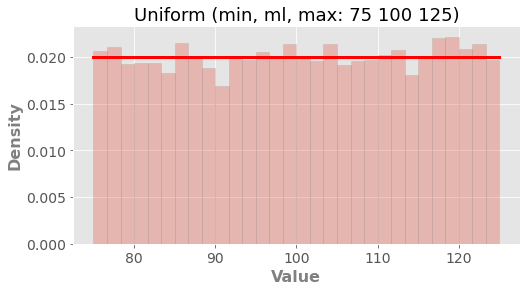

Descriptive Statistics
mean:     100.2315
sem:      0.1452
median:   100.2856
min:      75.0006
max:      124.9985
stdev:    14.5152
skew:    -0.0269
kurt:    -1.2076
p05:      77.4033
p50:      100.2856
p95:      122.4962
mean density (uy): 0.019999999999999997


In [4]:
from scipy.stats import uniform

uloc=min
uscale=max-min

uvals = uniform.rvs(uloc, uscale, size)
ux = np.linspace(np.min(uvals), np.max(uvals), 100)
uy = uniform.pdf(ux, uloc, uscale) 

fig = plt.figure(figsize=(8,4))
plt.plot(ux, uy, lw=3, c='r')
plt.hist(uvals, bins=30, density=True, edgecolor='gray', alpha=.3)
plt.title('Uniform (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.show()

# Print Descriptive Statistics
my_stats(uvals)
print('mean density (uy):', np.mean(uy))

## Normal Distribution
- Inputs to the Normal distribution estimation are the mean (mu) and standardard deviation (sigma)
- given min and max values, the standard deviation can be approximated using the Range Rule:
    - nstd = range / (3*sqrt(ln(n))-1.5) Ramirez and Cox (2012)
- Below are Numpy and Scipy examples of caluclating the normal 

In [5]:
# Normal Distribution using Numpy
nmin=min                    # The leading "n" in the variable name is for "normal"
nml = ml
nmax = max
                              # Unsing the "Range Rule" to estimate the standard deviation
nstd = (nmax-nmin) / (3*np.sqrt(np.log(size))-1.5)

mu, sigma = nml, nstd # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 10000) # NOTE: s is a nupy arry Dtype

# Print Descriptive Statistics
my_stats(s)

Descriptive Statistics
mean:     100.0649
sem:      0.0659
median:   100.0227
min:      74.6711
max:      124.9390
stdev:    6.5858
skew:     0.0294
kurt:     0.0700
p05:      89.1538
p50:      100.0227
p95:      110.8918


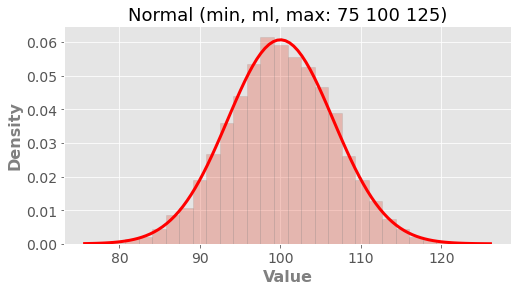

Descriptive Statistics
mean:     100.0863
sem:      0.0657
median:   100.0365
min:      75.6723
max:      126.0913
stdev:    6.5689
skew:     0.0019
kurt:    -0.0104
p05:      89.3360
p50:      100.0365
p95:      110.8496


In [6]:
# Normal Distributon
from scipy.stats import norm

# The location (loc) keyword specifies the mean. 
# The scale (scale) keyword specifies the standard deviation.

nvals = norm.rvs(loc=nml, scale=nstd, size=size, random_state=None)
nx = np.linspace(np.min(nvals), np.max(nvals), 100)
ny=norm.pdf(nx, nml, nstd)

fig = plt.figure(figsize=(8,4))
plt.plot(nx, norm.pdf(nx,nml,nstd), lw=3, c='r')
plt.hist(nvals, bins=30, density=True, edgecolor='gray', alpha=.3)
plt.title('Normal (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Normal (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

# Print Descriptive Statistics
my_stats(nvals)

### Truncated Normal Distribution
#### Scipy's Built-in truncnorm
- truncnorm.pdf(x, zmin, zmax, loc, scale) - Note: In the scipy documentation zmin is called a, and zmax is called b. I've changed the nomenclature because a and b are used elsewhere in the code for alpha and beta
    - Where x=random values, zmin=z-score of the min, zmax=z-score of the max, loc=mean, scale=StDev
- truncnorm.rvs(a, b, loc, scale, size, random_state)
    - Where: zmin=z-score of the min, zmax=z-score of the max, loc=mean, scale=StDev, size=number of trials, random_state=seed value or None)
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html
#### Alternate Truncation Method (published algorithm)
This method is a normalized version of the truncation based on a internet source used in Excel
- ref: Mike Middleton, https://groups.google.com/g/microsoft.public.excel.worksheetfunctions/c/CQKgiNUbBiU?pli=1

- =NORM.INV(NORM.DIST(MinX,Mean,StDev,TRUE) +  RAND()*(NORM.DIST(MaxX,Mean,StDev,TRUE) - NORM.DIST(MinX,Mean,StDev,TRUE)),Mean,StDev)  
- Where the NORM.DIST is the cummulative function (cdf) and NORM.INV is the Inverse of the cumulative function (pdf)

This equation is converted to Python by taking the inverse of the cdf parameters using Pythons percent point functions (ppf) that outputs quantiles (q) which are the inputs to Python's pdf function.

Syntax:
- cdf(x, loc=0, scale=1)	Cumulative density function.
- ppf(q, loc=0, scale=1)	Percent point function (inverse of cdf — percentiles).
- pdf(x, loc=0, scale=1)	Probability density function.
- where: q=quantiles from ppf function, x=x values, loc=ml, scale=std

Input ml and mnstd:       100.00 19.72
Alt Method mean and std:  99.88 12.97
Pyt Method mean and std:  100.11 12.59
q min and max:            75.86 124.14
Untruncated min and max:  27.72 172.10
q count:  10000


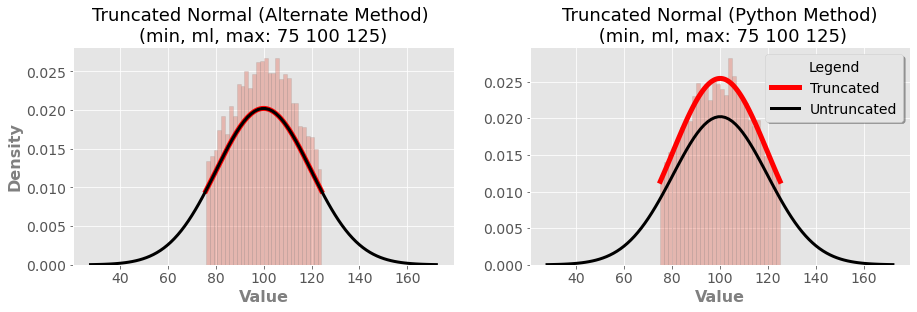

In [7]:
# PYTHON METHOD FOR TRUNCATION OF NORMAL DISTRIBUTION
#########################################################
from scipy.stats import truncnorm

nmin=min # The leading "n" in the variable name is for "normal" 
nml = ml
nmax = max 
std_multiplier= 3 # Used to stretch the distribution

#Unsing the "Range Rule" to estimate the standard deviation
nstd = (nmax-nmin) / (3*np.sqrt(np.log(size))-1.5)

mnstd=nstd*std_multiplier # The modified StDev can be used to stretch the PDF
             # This was done to force the the x values beyond the min and max inputs

# The location (loc) keyword specifies the mean.
# The scale (scale) keyword specifies the standard deviation.

# Untruncated Normal Distribution
nvals2 = norm.rvs(loc=nml, scale=mnstd, size=size, random_state=None)
nx2 = np.linspace(np.min(nvals2), np.max(nvals2), 100)
ny2=norm.pdf(nx2, nml, mnstd)

#Python Method for Truncations
#Parameters zmin and zmax are the z-scores for the truncated minimum and maximum values
zmin, zmax = (nmin - nml) / mnstd, (nmax - nml) / mnstd

tnvals=truncnorm.rvs(zmin, zmax, loc=nml, scale=mnstd, size=10000, random_state=None)
tnx = np.linspace(np.min(tnvals), np.max(tnvals), 100)
tny = truncnorm.pdf(tnx, zmin, zmax, nml, mnstd)

###################################################################
#ALTERNATE TRUNCATION METHOD OF MIDDLETON FOR NORMAL DISTRIBUTIONS
################################################################### import random

# Calculate the Percent Point Function to calculate the quantile values (i.e., X values of inverse cdf)
q=np.sort(norm.ppf(norm.cdf(nmin, loc=nml, scale=mnstd) + np.random.uniform(.01, .99, size)
                 *(norm.cdf(nmax, loc=nml, scale=mnstd)
                 - norm.cdf(nmin, loc=nml, scale=mnstd)), loc=ml, scale=mnstd))

# Key Stats for truncated x values
t0_mean, t0_std = np.mean(tnvals), np.std(tnvals) # Python Method
t1_mean, t1_std = np.mean(q), np.std(q)           # Alternate Method


print("Input ml and mnstd:      ", '%.2f'%ml, '%.2f'%mnstd)
print("Alt Method mean and std: ", '%.2f'%t0_mean, '%.2f'%t0_std)
print("Pyt Method mean and std: ", '%.2f'%t1_mean, '%.2f'%t1_std)
print("q min and max:           ", '%.2f'%np.min(q), '%.2f'%np.max(q))
print("Untruncated min and max: ", '%.2f'%np.min(nx2), '%.2f'%np.max(nx2))
print("q count: ", q.size)

tny2=norm.pdf(q, nml, mnstd)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,4))
#fig = plt.figure(figsize=(8,4))
ax1.plot(q, tny2, lw=5, c='r', label='Truncated PDF')
ax1.plot(nx2, ny2, lw=3, c='k', label='Untruncated PDF')
ax1.hist(q, bins=30, density=True, edgecolor='gray', alpha=.3)
ax1.set_title('Truncated Normal (Alternate Method) \n(min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#ax1.legend(loc="upper right", fontsize=14, title='Legend', shadow=True)
ax2.plot(tnx, tny, lw=5, c='r', label="Truncated")
ax2.plot(nx2, ny2, lw=3, c='k', label="Untruncated")
ax2.hist(tnvals, bins=30, density=True, edgecolor='gray', alpha=.3)
ax2.set_title('Truncated Normal (Python Method)\n (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.legend(loc="upper right", fontsize=14, title='Legend', shadow=True)
plt.show()



## Triangular Distribution

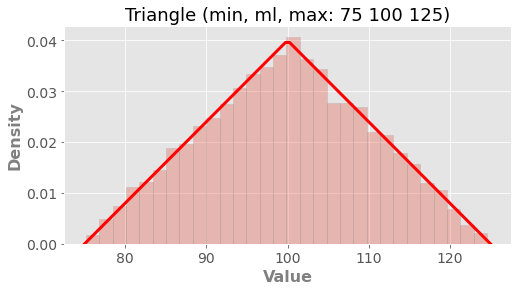

Descriptive Statistics
mean:     99.8500
sem:      0.1028
median:   99.9680
min:      75.1509
max:      124.5768
stdev:    10.2806
skew:    -0.0111
kurt:    -0.6198
p05:      82.6099
p50:      99.9680
p95:      116.9718


In [8]:
# Triangle Distribution
from scipy.stats import triang
tmin=min
tml=ml
tmax=max

#c = (mode - left) / (right - left)
#loc = left
#scale = right - left

c=(tml-tmin)/(tmax-tmin)

tx = np.linspace(tmin, tmax, 100)
ty = triang.pdf(tx, c, loc=tmin, scale=tmax-tmin)
tvals=triang.rvs(c, loc=tmin, scale=tmax-tmin, size=size, random_state=None)

fig = plt.figure(figsize=(8,4))
plt.plot(tx, ty,lw=3, c='r')
plt.hist(tvals, bins=30, edgecolor='gray', density=True, alpha=.3)
plt.title('Triangle (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Triangle (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

# Print Descriptive Statistics
my_stats(tvals)

## Beta Distribution

In [9]:
# pip install pertdist
# only run once for the install and unditized for an earlier Seaborn plot - not very good plot

### Two Method to calculate Beta-PERT Shape Parameters
**<u>Method 1 (original)</u>**
- 𝛼 and 𝛽 are shape parameters, where a=min, b=ml and c=max
- 𝛼 = (4b + c - 5a) / (c - a) 
- 𝛽 = (5c - a -4b) / (c - a)
- For the scipy beta function inputs are:
    - 𝛼 , 𝛽, loc (lower limit), scale (upper limit - lower limit)
    
**<u>Method 2 (original) Modified Beta Distribution</u>**
Method 2 has a modified formula for the shape parameters alpha (a) and beta (b) that can increase or decrease the spread of the distribution. The parameter Lambda (L) is used to modify the spread, where L=10 approximates the normal distribution. Smaller values (L < 10) increase the spread with .01 approximating a uniform distribution. L > 10 decreases the spread of the distribution.
- Method 2 is based on Heiko Onnen's 2021 article HANDS-ON TUTORIAL, Python Scenario Analysis: Modeling Expert Estimates with the beta-PERT Distribution, And How to Add a New, User-Defined Distribution to SciPy’s Catalogue,
- https://towardsdatascience.com/python-scenario-analysis-modeling-expert-estimates-with-the-beta-pert-distribution-22a5e90cfa79
- Method 2 - Calculate a and b
- 𝛼=1+ 𝜆 * (mode - min) / (max - min)
- 𝛽=1+ 𝜆 * (max - mode) / (max - mn)


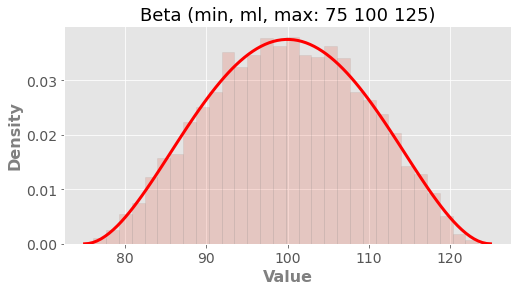

alpha and beta:  3.0 3.0
Descriptive Statistics
mean:     99.8951
sem:      0.0941
median:   99.9316
min:      76.0524
max:      123.5074
stdev:    9.4080
skew:    -0.0231
kurt:    -0.6906
p05:      84.3224
p50:      99.9316
p95:      115.3153


In [10]:
# Beta Distribution
from scipy.stats import beta

amin = min
bml =  ml
cmax = max
L=4              # 4 is equivalent to Method 1, the origial technique

# a = (4*bml + cmax -5*amin) / (cmax-amin)
# b = (5*cmax - amin - 4*bml) / (cmax-amin)

a= 1 + L * (bml-amin) / (cmax-amin)
b= 1 + L * (cmax-bml) / (cmax-amin)

bx = np.linspace(amin, cmax, 100)
by = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)
bvals =beta.rvs(a, b, loc=amin, scale=cmax-amin, size=size, random_state=None)

fig = plt.figure(figsize=(8,4))
plt.plot(bx, by,lw=3, c='r')
plt.hist(bvals, bins=30, edgecolor='gray', density=True, alpha=.2)
plt.title('Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                           # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

# Print Descriptive Statistics
print('alpha and beta: ', a, b)
my_stats(bvals)

### Flattened Beta
This technique was created to change the dispersion of the original Beta method (1) by using a divisor. It is essentially obsolete by the use of the modified Beta (method 2). It is include because it illustrates a method of changing the dispersion. 

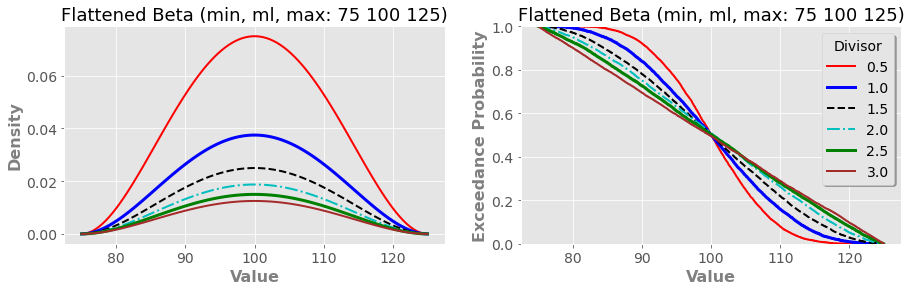

In [11]:
# This list is for the symmetric distribution w/ a,b=3,3. You'll have to divide by 10
list=np.arange(5,35,5) 

# This list is for the skew dist w/ a,b=1.8, 4.2. You'll have to divide by 100
#list=[50, 75, 100, 125, 150] 

fbx = bx

# Note that for the .pdf: the whole function is divided by FD, But for the fbvals: a and b are divided by FD
for i in list:
    FD= i/10
    globals()["fby_"+str(i)] = beta.pdf(fbx, a, b, loc=amin, scale=cmax-amin)/FD
    globals()["fbvals_"+str(i)] =beta.rvs(a/FD, b/FD, loc=amin, scale=cmax-amin, size=size, random_state=None)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,4))
ax1.plot(fbx, fby_5 ,lw=2, c='r', ls='-', label='0.5')
ax1.plot(fbx, fby_10,lw=3, c='b', ls='-', label='1.0')
ax1.plot(fbx, fby_15,lw=2, c='k', ls='--', label='1.5')
ax1.plot(fbx, fby_20,lw=2, c='c', ls='-.', label='2.0')
ax1.plot(fbx, fby_25,lw=3, c='g', ls='-', label='2.5')
ax1.plot(fbx, fby_30,lw=2, c='brown', ls='-', label='3.0')
ax1.set_title('Flattened Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)       
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')

sns.ecdfplot(fbvals_5, lw=2, c='r', ls='-', label='0.5', complementary=True)
sns.ecdfplot(fbvals_10,lw=3, c='b', ls='-', label='1.0', complementary=True)
sns.ecdfplot(fbvals_15,lw=2, c='k', ls='--', label='1.5', complementary=True)
sns.ecdfplot(fbvals_20,lw=2, c='c', ls='-.', label='2.0', complementary=True)
sns.ecdfplot(fbvals_25,lw=3, c='g', ls='-', label='2.5', complementary=True)
sns.ecdfplot(fbvals_30,lw=2, c='brown', ls='-', label='3.0', complementary=True)
ax2.legend(fontsize=14, title='Divisor', shadow=True)
ax2.set_title('Flattened Beta (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('Exceedance Probability', fontsize =16, fontweight='bold', color='gray')
plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Flattened Beta.png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

#### Flattened Beta Statistics
- The 75-100-125 Min, Ml, Max unflattened Beta distribution has an alpha=3 and beta=3
- An increase in the divisor flattens the beta distribution, conversely a decrease in divisor narrows it
- when the divisor equals the numerator, alpha and beta become 1 producing a flat line (uniform) distribution.

#### Descriptive statistics for flattened Beta distributions

In [12]:
# db = {'Divisor' : ['0.5', '1.0', '1.5', '2.0', '2.5', '3.0'],
#      'mean': [np.mean(fbvals_5), np.mean(fbvals_10), np.mean(fbvals_15), np.mean(fbvals_20), np.mean(fbvals_25), np.mean(fbvals_30)],
#      'sem':  [stats.sem(fbvals_5), stats.sem(fbvals_10), stats.sem(fbvals_15), stats.sem(fbvals_20), stats.sem(fbvals_25), stats.sem(fbvals_30)],
#      'median': [np.median(fbvals_5), np.median(fbvals_10), np.median(fbvals_15), np.median(fbvals_20), np.median(fbvals_25), np.median(fbvals_30)],
#      'min':  [np.min(fbvals_5), np.min(fbvals_10), np.min(fbvals_15), np.min(fbvals_20), np.min(fbvals_25), np.min(fbvals_30)],
#      'max':  [np.max(fbvals_5), np.max(fbvals_10), np.max(fbvals_15), np.max(fbvals_20), np.max(fbvals_25), np.max(fbvals_30)],
#      'std':  [np.std(fbvals_5), np.std(fbvals_10), np.std(fbvals_15), np.std(fbvals_20), np.std(fbvals_25), np.std(fbvals_30)],
#      'skew': [skew(fbvals_5), skew(fbvals_10), skew(fbvals_15), skew(fbvals_20), skew(fbvals_25), skew(fbvals_30)],
#      'kurtosis': [kurtosis(fbvals_5), kurtosis(fbvals_10), kurtosis(fbvals_15), kurtosis(fbvals_20), kurtosis(fbvals_25), kurtosis(fbvals_30)],
#      'P95':  [np.percentile(fbvals_5,5), np.percentile(fbvals_10,5), np.percentile(fbvals_15,5), np.percentile(fbvals_20,5), np.percentile(fbvals_25, 5), np.percentile(fbvals_30, 5)],
#      'P50':  [np.percentile(fbvals_5,50), np.percentile(fbvals_10,50), np.percentile(fbvals_15,50), np.percentile(fbvals_20,50), np.percentile(fbvals_25, 50), np.percentile(fbvals_30, 50)],
#      'P05':  [np.percentile(fbvals_5,95), np.percentile(fbvals_10,95), np.percentile(fbvals_15,95), np.percentile(fbvals_20,95), np.percentile(fbvals_25, 95), np.percentile(fbvals_30, 95)]}  
# df_stats_beta = pd.DataFrame(data=db)#.set_index('DisType')
# df_stats_beta['pct_delta_std']=(df_stats_beta['std'].shift(-1)-df_stats_beta['std'])/df_stats_beta['std'].shift(-1)
# pd.options.display.float_format = "{:,.2f}".format
# df_stats_beta.style.set_table_attributes('style="font-size: 24px"')
# display(df_stats_beta)

# fig=plt.subplots(figsize=(8,5))
# plt.scatter(df_stats_beta['Divisor'],df_stats_beta['std'], s=100)
# plt.title('Flattened Beta, Divisor vs Standard Deviation', fontsize=18)       
# plt.xlabel('Flattening Divisor', fontsize =16, fontweight='bold', color='gray')
# plt.ylabel('Standard Deviation', fontsize =16, fontweight='bold', color='gray')

## Gamma Distribution
- Inputs are two shape parmaters (𝛼, β):
- **𝛼 =  m^2/v,    β=v/m,    where m=mean and v=variance**
- It is difficult to estimate alpha and beta for inputs of min, ml and max values, especially in asymmetic distributions. Therefore, alpha and beta are calculated from the Beta distribution using *gamma.fit()*
- Also, the shape parameters alpha and beta can be calculated from the Triangle distribution using the *gamma.fit()*
- **MY SUBJECTIVE OPIONION IS THAT FITTING THE GAMMA DISTRIBUTION TO THE BETA VALUES PROVIDES A MORE REALISTIC ANSWER BECAUSE THE BETA VALUES ARE CONFINED TO THE RANGE OF THE INPUT DATA AND IT'S DISTRIBUTION AS SOME CURVED TAILS.**


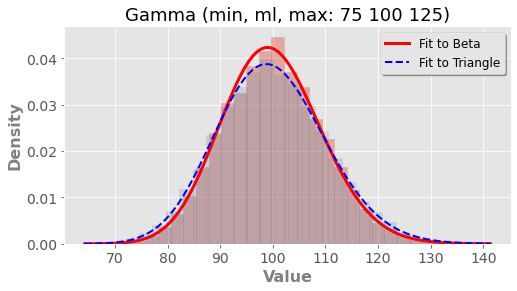

alpha and beta:  111.57994611028646 0.8952779539182802


In [13]:
#Gamma Distribution
from scipy.stats import gamma

gmin=min
gml=ml
gmax=max

# Note: the gmin and gmax values are redefined below so that the line plot x values
# will be consistent with the modeled range of the data.

bfit_alpha, bfit_loc, bfit_beta = gamma.fit(bvals, floc=0)
tfit_alpha, tfit_loc, tfit_beta = gamma.fit(tvals, floc=0)

gx = np.linspace(gmin, gmax, 100)
gvals = gamma.rvs(bfit_alpha, loc=bfit_loc, scale=bfit_beta, size=size, random_state=None)
gvalst = gamma.rvs(tfit_alpha, loc=bfit_loc, scale=tfit_beta, size=size, random_state=None)
gmin = np.min([gvals, gvalst]) 
gmax = np.max([gvals, gvalst])
gx = np.linspace(gmin, gmax, 100)
gyb = gamma.pdf(gx, bfit_alpha, loc=bfit_loc, scale=bfit_beta)
gyt = gamma.pdf(gx, tfit_alpha, loc=tfit_loc, scale=tfit_beta)

fig = plt.figure(figsize=(8,4))
plt.plot(gx, gyb,lw=3, c='r', label='Fit to Beta')
plt.plot(gx, gyt,lw=2, c='b', label='Fit to Triangle', ls='--')
plt.hist(gvals, bins=30, edgecolor='gray', density=True, alpha=.4)
plt.hist(gvalst, bins=30, edgecolor='gray', density=True, alpha=.2)
plt.legend(fontsize=12, shadow=True)
plt.title('Gamma (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.show()

print('alpha and beta: ', bfit_alpha, bfit_beta)

# ################################################# Change Directory and write files
# #os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# # print(os.path.abspath(os.curdir))

# fig.savefig('Gamma (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

## Compare Lognormal input parameters for various techniques
The methods that works are the extracted parameters from random values or a beta or gamma distribution

In [14]:

from scipy.stats import lognorm

# Look at the basic statistics of the Beta random values
# beta_mean=np.mean(bvals)
# beta_std=np.std(bvals)
print("Beta Distribution Mean:     ", np.mean(bvals))
print("Beta Distribution Median:   ", np.median(bvals))
print("Beta Distribution StDev:    ", np.std(bvals))
print("\n")

# Lognomal inputs from Beta Distribution
shape1, loc1, scale1 = stats.lognorm.fit(bvals, floc=min)
print("Beta Extracted Scale -Mu:   ", scale1)
print("Beta Extracted Shape -Sigma:", shape1)
print("Beta Extracted Loc - Phi:   ", loc1)
print("\n")

# The Excel Method:
# This is what I used in Excel and it works there but not in Python
mu=(np.log(bml)+2*np.log(np.mean(bvals)))/3
sigma=np.sqrt(2/3*(np.log(np.mean(bvals))-np.log(bml)))
print("Excel derived Mu - Scale:   ", mu)
print("Excel derived Sigma - Shape:", sigma)
print("\n")

# Lognomal input parameters from literature
bmean=np.mean(bvals)
bvar=np.var(bvals)
loc2=np.sqrt(bvar+bmean**2)
scale2=np.log(bmean**2/loc2)
shape2= np.sqrt(np.log(loc2**2/bmean**2))
print("Literature derived Scale:   ", scale2)
print("Literature derived Shape:   ", shape2)
print("Literature derived Loc:     ", loc2)


Beta Distribution Mean:      99.89506585192923
Beta Distribution Median:    99.93158859701029
Beta Distribution StDev:     9.407971929670815


Beta Extracted Scale -Mu:    22.73455847983936
Beta Extracted Shape -Sigma: 0.46440388308805197
Beta Extracted Loc - Phi:    75.0


Excel derived Mu - Scale:    4.604470257704803
Excel derived Sigma - Shape: nan


Literature derived Scale:    4.599705046334265
Literature derived Shape:    0.0939707106378895
Literature derived Loc:      100.33710239682404


/var/folders/14/gy7rs80n3fsdn2n5r1dvyvn80000gn/T/ipykernel_6371/47001284.py:21: RuntimeWarning: invalid value encountered in sqrt
  sigma=np.sqrt(2/3*(np.log(np.mean(bvals))-np.log(bml)))


## Lognormal Distribution
Fitting a lognormal distribution to the min-ml-max values is not as simple as one would think. I've found that the key parameters for the distribution are shape, locations (loc) and Scale. Where, shape (s) =sigma, loc=min x value, scale=median, size=the number of trials, random_state=seed value for the random values or None, x=linespace values

Scipt syntax:
- lognorm.rvs(s, loc=min, scale=ml, size=size, random_state=None)
- lognorm.pdf(x, shape, loc=loc, scale=scale)
- Where,shape (s)=sigma, loc=min x value, scale(mu)=median, size=number of trials, random_state=a seed for the random values or None, x=the linespace values

According to the literature the variable are calculated as follows (But this doesn't work for the scipy functions):
- ∅=sqrt(v+m^2) = loc
- μ=ln⁡(m^2/∅)   = scale
- σ= sqrt(ln⁡(∅^2/m^2)) = shape
- Where:  m is the arithmetic mean and v is variance, ∅ is the location

In Excel the lognorm function takes two parameter: mean and standard deviation
The mean (Mu, 𝜇) and standard_dev (Sigma, 𝜎) can be estimated from a ML input and mean of the Beta or Triangle distribution as shown by Nederlof (2020). Mu and Sigma can be calculate as follows:

    𝜇(𝑀𝑢)= (ln⁡(𝑚𝑙)+2ln(𝑚𝑒𝑎𝑛))/3          𝜎(𝑆𝑖𝑔𝑚𝑎)= sqrt(2/3(ln(𝑚𝑒𝑎𝑛)−ln(𝑚𝑙))

    Where ml is the most-likely input and the mean is the output of the Beta or Trianlge distribution
From Nederlof, M.H, 2020, Geology And Energy Analysis (GAEA) Consultancy, software and education for Oil and Gas Exploration, internet resource: https://www.mhnederlof.nl/lognormal.html




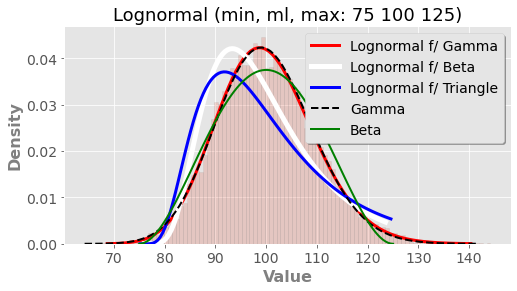

Shape, Loc, Scale from Gamma: 0.10 0.00 99.57
Shape, Loc, Scale from Beta:  0.46 75.00 22.73
Shape, Loc, Scale from Triag: 0.55 75.00 22.08
Geometric Mean for Gamma, Beta, Triange:  102.36 98.81 98.81

From Gamma:
Descriptive Statistics
mean:     100.0113
sem:      0.0957
median:   99.5030
min:      67.5931
max:      144.1735
stdev:    9.5655
skew:     0.3011
kurt:     0.1652
p05:      85.2921
p50:      99.5030
p95:      116.5485

From Beta:
Descriptive Statistics
mean:     100.4444
sem:      0.1277
median:   97.8581
min:      78.1113
max:      215.4408
stdev:    12.7658
skew:     1.6313
kurt:     4.8742
p05:      85.3986
p50:      97.8581
p95:      124.4852

From Triangle:
Descriptive Statistics
mean:     100.9183
sem:      0.1535
median:   97.4218
min:      77.4931
max:      277.3641
stdev:    15.3536
skew:     1.9813
kurt:     7.4891
p05:      84.0952
p50:      97.4218
p95:      129.9727


In [15]:
#Lognormal Distribution
from scipy.stats import lognorm
from scipy.stats import gmean

lnmin= min
lnml= ml
lnmax= max

####### METHOD ONE: USING THE EXTRACTED VALUES FROM THE GAMMA DISTRIBUTION ########
# Extract the gamma model shape parameters for the lognormal distribution
shape, loc, scale = stats.lognorm.fit(gvals, floc=0)
lnvals =lognorm.rvs(shape, loc=loc, scale=scale, size=size, random_state=None)

# Gamma: Recalculate the min and max values to fit the lognormal outputs for plotting
lnx = np.linspace(np.min(gvals), np.max(gvals), 100)
lny = lognorm.pdf(lnx, shape, loc=loc, scale=scale)

####### METHOD TWO: USING THE EXTRACTED VALUES FROM THE BETA DISTRIBUTION ########
# Extract the Beta model shape parameters for the lognormal distribution
shape1, loc1, scale1 = stats.lognorm.fit(bvals, floc=min)
lnvals1 =lognorm.rvs(shape1, loc=loc1, scale=scale1, size=size, random_state=None)

# Beta: Recalculate the min and max values to fit the lognormal outputs for plotting
lnx1 = np.linspace(np.min(bvals), np.max(bvals), 100)
lny1 = lognorm.pdf(lnx1, shape1, loc=loc1, scale=scale1)

####### METHOD THREE: USING THE EXTRACTED VALUES FROM THE TRIANGLE DISTRIBUTION ########
# Extract the Triangle model shape parameters for the lognormal distribution
shape2, loc2, scale2 = stats.lognorm.fit(tvals, floc=min)
lnvals2 =lognorm.rvs(shape2, loc=loc2, scale=scale2, size=size, random_state=None)

# Triangle: Recalculate the min and max values to fit the lognormal outputs for plotting
lnx2 = np.linspace(np.min(tvals), np.max(tvals), 100)
lny2 = lognorm.pdf(lnx2, shape2, loc=loc2, scale=scale1)

fig = plt.figure(figsize=(8,4))
plt.plot(lnx, lny,lw=3, c='r', label='Lognormal f/ Gamma')
plt.plot(lnx1, lny1,lw=5, c='w', label='Lognormal f/ Beta')
plt.plot(lnx2, lny2,lw=3, c='b', label='Lognormal f/ Triangle')
plt.hist(lnvals, bins=100, edgecolor='gray', density=True, alpha=.2)
plt.plot(gx, gyb,lw=2, c='k', ls='--', label='Gamma')
plt.plot(bx, by,lw=2, c='g', label='Beta')
#plt.xlim(lnmin, lnmax)
#plt.yscale('log')
plt.title('Lognormal (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#plt.xlim(0, 2000)
plt.legend(fontsize=14, shadow=True)
plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Lognormal (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

# Print Descriptive Statistics
print("Shape, Loc, Scale from Gamma:",'%.2f'%shape, '%.2f'%loc, '%.2f'%scale)
print("Shape, Loc, Scale from Beta: ",'%.2f'%shape1, '%.2f'%loc1, '%.2f'%scale1)
print("Shape, Loc, Scale from Triag:",'%.2f'%shape2, '%.2f'%loc2, '%.2f'%scale2)

print("Geometric Mean for Gamma, Beta, Triange: ", '%.2f'%gmean(lnx), '%.2f'%gmean(lnx1), '%.2f'%gmean(lnx2))

print("\n" + "From Gamma:")
my_stats(lnvals)
print("\n" + "From Beta:")
my_stats(lnvals1)
print("\n" + "From Triangle:")
my_stats(lnvals2)



### Truncated Lognormal Distribution
There is no built in lognormal truncation function in Python. The method suggested by Mike Middleton was used
##### This method is a normalized version of the truncation based on a internet source used in Excel
- =LOGNORM.INV(LOGNORM.DIST(MinX,Mean,StDev,TRUE) + RAND()*(LOGNORM.DIST(MaxX,Mean,StDev,TRUE) - LOGNORM.DIST(MinX,Mean,StDev,TRUE)),Mean,StDev)

- Where the NORM.DIST is the cummulative function (cdf) and NORM.INV is the Inverse of the cumulative function (pdf)
- ref: Mike Middleton, https://groups.google.com/g/microsoft.public.excel.worksheetfunctions/c/CQKgiNUbBiU?pli=1

Python functions used:
- rvs(s, loc=0, scale=1, size=1).....Random variates.
- pdf(x, s, loc=0, scale=1).............Probability density function.
- cdf(x, s, loc=0, scale=1).............Cumulative density function.
- ppf(q, s, loc=0, scale=1).............Percent point function (inverse of cdf — percentiles)

#### Normality tests for truncated pdfs
- Compared the mean and median of the log of the lognormal data
- Used a KS test
- Used a Q-Q Probability Plot
- Good Ref: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

NORMALITY TESTS
if ks_pvalue < 0.05 the distribution is lognormal
ks_stat, ks_pvalue:  1.00 0.000
Mean and Median of log(qln):  4.588 4.578


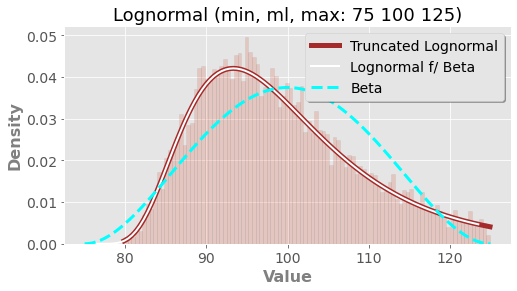

min and max qln:  79.86198973066456 124.94657949464096


In [16]:
#Lognormal Distribution
from scipy.stats import lognorm
from scipy.stats import gmean

lnmin= min
lnml= ml
lnmax= max

####### METHOD ONE: USING THE EXTRACTED VALUES FROM THE GAMMA DISTRIBUTION ########
# Extract the gamma model shape parameters for the lognormal distribution
shape, loc, scale = lognorm.fit(gvals, floc=0)
lnvals =lognorm.rvs(shape, loc=loc, scale=scale, size=size, random_state=None)

# Gamma: Recalculate the min and max values to fit the lognormal outputs for plotting
lnx = np.linspace(np.min(gvals), np.max(gvals), 100)
lny = lognorm.pdf(lnx, shape, loc=loc, scale=scale)

####### METHOD TWO: USING THE EXTRACTED VALUES FROM THE BETA DISTRIBUTION ########
# Extract the Beta model shape parameters for the lognormal distribution
shape1, loc1, scale1 = lognorm.fit(bvals, floc=min)
lnvals1 =lognorm.rvs(shape1, loc=loc1, scale=scale1, size=size, random_state=None)

# Beta: Recalculate the min and max values to fit the lognormal outputs for plotting
lnx1 = np.linspace(np.min(bvals), np.max(bvals), 100)
lny1 = lognorm.pdf(lnx1, shape1, loc=loc1, scale=scale1)

####### METHOD THREE: USING THE EXTRACTED VALUES FROM THE TRIANGLE DISTRIBUTION ########
# Extract the Triangle model shape parameters for the lognormal distribution
shape2, loc2, scale2 = lognorm.fit(tvals, floc=min)
lnvals2 =lognorm.rvs(shape2, loc=loc2, scale=scale2, size=size, random_state=None)

# Triangle: Recalculate the min and max values to fit the lognormal outputs for plotting
lnx2 = np.linspace(np.min(tvals), np.max(tvals), 100)
lny2 = lognorm.pdf(lnx2, shape2, loc=loc2, scale=scale1)

###################################################################
#TRUNCATION METHOD OF MIDDLETON FOR NORMAL DISTRIBUTIONS
################################################################### import random

# Calculate the Percent Point Function to calculate the quantile values (i.e., X values of inverse cdf)
qln=np.sort(lognorm.ppf(lognorm.cdf(lnmin, shape1, loc=loc1, scale=scale1) + np.random.uniform(.0001, .9999, size)
                    *(lognorm.cdf(lnmax, shape1, loc=loc1, scale=scale1)
                    - lognorm.cdf(lnmin, shape1, loc=loc1, scale=scale1)), shape1, loc=loc1, scale=scale1))

tlny=lognorm.pdf(qln, shape1,loc=loc1, scale=scale1)

#################################### Test for Log Normality
from scipy.stats import kstest
import scipy
import pylab

# scipy.stats.probplot(np.log(qln), dist="norm", plot=pylab)
# pylab.show()

# plt.hist(np.log(qln), bins=100, edgecolor='gray', density=True, alpha=.2)
# plt.title("Histogram of ln(qln)")

ks_stat, ks_pvalue = kstest(np.log(qln),'norm')

print("NORMALITY TESTS"+"\n"+"if ks_pvalue < 0.05 the distribution is lognormal")
print("ks_stat, ks_pvalue: ", '%.2f'%ks_stat, '%.3f'%ks_pvalue)
print("Mean and Median of log(qln): ", '%.3f'%np.mean(np.log(qln)), '%.3f'%np.median(np.log(qln)))
#####################################

fig = plt.figure(figsize=(8,4))
plt.plot(qln, tlny, lw=5, c='brown', label='Truncated Lognormal')
# plt.plot(lnx, lny,lw=3, c='r', label='Lognormal f/ Gamma')
plt.plot(lnx1, lny1,lw=2, c='w', label='Lognormal f/ Beta')
# plt.plot(lnx2, lny2,lw=3, c='b', label='Lognormal f/ Triangle')
plt.hist(qln, bins=100, edgecolor='gray', density=True, alpha=.2)
# plt.plot(gx, gyb,lw=2, c='k', ls='--', label='Gamma')
plt.plot(bx, by,lw=3, c='cyan', ls='--', label='Beta')
#plt.xlim(lnmin, lnmax)
#plt.xscale('log')
plt.title('Lognormal (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#plt.xlim(0, 250)
plt.legend(fontsize=14, shadow=True)
plt.show()

print('min and max qln: ', np.min(qln), np.max(qln))

# Summarize Distribution

## Find the Mode Values for Distributions
Note: This approximation of mode sometimes produces non-unique values because
     the algorithm looks for the x value tied to the maximum density value. For a continuous distribution there can be more than one x value associated with the same density value

In [17]:
# Find Mode Values for the Normal, Triangle, Beta, Gamma and Lognormal Distribution

# Mode value for Normal
mode_n = pd.DataFrame({'x':nx, 'y':ny})
mode_n = mode_n.loc[(mode_n['y']==mode_n['y'].max())]
mode_n['DisType']='Normal'

# Mode value for Triangle
mode_t = pd.DataFrame({'x':tx, 'y':ty})
mode_t = mode_t.loc[(mode_t['y']==mode_t['y'].max())]
mode_t['DisType']='Triangle'

# Mode value for Beta
mode_b = pd.DataFrame({'x':bx, 'y':by})
mode_b = mode_b.loc[(mode_b['y']==mode_b['y'].max())]
mode_b['DisType']='Beta'

# Mode value for Gamma
mode_g = pd.DataFrame({'x':gx, 'y':gyb})
mode_g = mode_g.loc[(mode_g['y']==mode_g['y'].max())]
mode_g['DisType']='Gamma'

# Mode value for Lognormal
mode_ln = pd.DataFrame({'x':lnx, 'y':lny})
mode_ln = mode_ln.loc[(mode_ln['y']==mode_ln['y'].max())]
mode_ln['DisType']='Lognormal'

# Mode value for Truncated Lognormal
mode_tln = pd.DataFrame({'x':qln, 'y':tlny})
mode_tln = mode_tln.loc[(mode_tln['y']==mode_tln['y'].max())]
mode_tln['DisType']='Truncated Lognormal'

# Mode value for Uniform
mode_u = pd.DataFrame({'x':ux, 'y':uy})
mode_u = mode_u.loc[(mode_u['y']==mode_u['y'].max())]
mode_u['DisType']='Uniform'
mode_u2 = pd.pivot_table(mode_u, values=['x', 'y'], index=['DisType'],
                    aggfunc={'x': np.mean,
                             'y': np.mean,
                             }).reset_index()

df_mode=mode_u2.append([mode_n, mode_t, mode_b, mode_g, mode_ln])

# #df_mode=mode_n.append([mode_t, mode_b, mode_g, mode_ln, mode_tln])
# #df_mode.set_index('DisType', inplace=True)
# #df_mode.reset_index()

pd.options.display.float_format = "{:,.5f}".format
display(df_mode)

/var/folders/14/gy7rs80n3fsdn2n5r1dvyvn80000gn/T/ipykernel_6371/4094669117.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mode=mode_u2.append([mode_n, mode_t, mode_b, mode_g, mode_ln])


,DisType,x,y
0,Uniform,99.99955,0.02000
48,Normal,100.11784,0.06067
49,Triangle,99.74747,0.03960
50,Triangle,100.25253,0.03960
49,Beta,99.74747,0.03749
50,Beta,100.25253,0.03749
45,Gamma,99.29141,0.04232
41,Lognormal,98.35387,0.04228


## Compare Probability Distributions

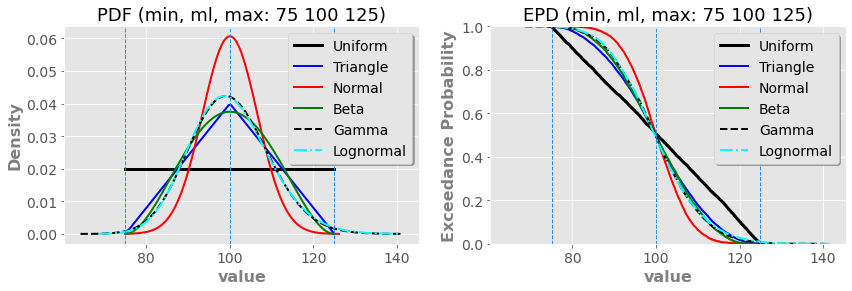

In [18]:
# Plot Separately
#sns.displot(t, kde=True)

# Plot Separately
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14,4))
ax1.plot(ux, uy,lw=3, c='k', label='Uniform')
ax1.plot(tx, ty,lw=2, c='b', label='Triangle')
ax1.plot(nx, norm.pdf(nx,nml,nstd), lw=2, c='r', label='Normal')
ax1.plot(bx, by,lw=2, c='g', label='Beta')
ax1.plot(gx, gyb,lw=2, c='k', ls='--', label='Gamma')
ax1.plot(lnx, lny, lw=2, c='cyan', ls='-.', label='Lognormal')

sns.ecdfplot(uvals, lw=3, c='k', label='Uniform', complementary=True)
sns.ecdfplot(tvals, lw=2, c='b', label='Triangle', complementary=True)
sns.ecdfplot(nvals, lw=2, c='r', label='Normal', complementary=True)
sns.ecdfplot(bvals, lw=2, c='g', label='Beta', complementary=True)
sns.ecdfplot(gvals, lw=2, c='k', label='Gamma', ls='--', complementary=True)
sns.ecdfplot(lnvals, lw=2, c='cyan', label='Lognormal', ls='-.', complementary=True)
ax1.legend(loc='upper right', fontsize=14, shadow=True)
plt.legend(loc='upper right', fontsize=14, shadow=True)
ax1.set_title('PDF (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
ax2.set_title('EPD (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
ax1.set_ylabel('Density', fontsize=16, fontweight='bold', color='gray')
ax2.set_ylabel('Exceedance Probability', fontsize=16, fontweight='bold', color='gray')
ax1.set_xlabel('value', fontsize=16, fontweight='bold', color='gray')
ax2.set_xlabel('value', fontsize=16, fontweight='bold', color='gray')
# Set x limits for lognormal example only
# ax1.set_xlim(0, 2000)
# ax2.set_xlim(0, 2000)

ax1.axvline(x=min, color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=ml,  color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=max, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=min, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=ml,  color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=max, color='dodgerblue', lw=1, linestyle='--')
plt.show()

################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('PDF CDFs (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
################################################ End of save figure script

## Biased Data Density Example

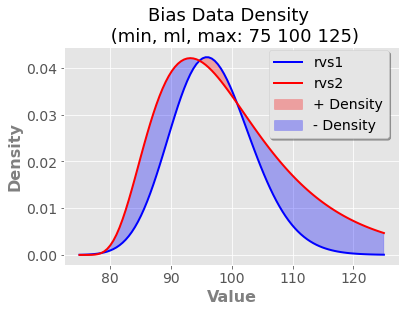

In [19]:
# Identify radom variable objects to compare: ny, ty, by, gyb, or lny (Gamma), lny1 (Beta), lny2 (Triangle)
rvs1=lny
rvs2=lny1
xvar = np.linspace(min, max, 100)
plt.plot(xvar, rvs1, lw=2, c='b', label='rvs1')
plt.plot(xvar, rvs2, lw=2, c='r', label='rvs2')
plt.fill_between(xvar, rvs1, rvs2, where=rvs1 >= rvs2,alpha=.3, color='red', label='+ Density')
plt.fill_between(xvar, rvs1, rvs2, where=rvs1 <= rvs2,alpha=.3, color='blue',label='- Density')
plt.title('Bias Data Density \n (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize=16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize=16, fontweight='bold', color='gray')
plt.legend(fontsize=14, shadow=True,bbox_to_anchor=(.99, 1.02))
plt.show()

### Descriptive Statistics Comparison Table

In [20]:
d = {'DisType' : ['Uniform','Normal', 'Beta', 'Triangle', 'Gamma', 'Lognormal'],
     'mean': [np.mean(uvals), np.mean(nvals), np.mean(bvals), np.mean(tvals), np.mean(gvals), np.mean(lnvals)],
     'sem':  [stats.sem(uvals), stats.sem(nvals), stats.sem(bvals), stats.sem(tvals), stats.sem(gvals), stats.sem(lnvals)],
     'min':  [np.min(uvals), np.min(nvals), np.min(bvals), np.min(tvals), np.min(gvals), np.min(lnvals)],
     'max':  [np.max(uvals), np.max(nvals), np.max(bvals), np.max(tvals), np.max(gvals), np.max(lnvals)],
     'std':  [np.std(uvals), np.std(nvals), np.std(bvals), np.std(tvals), np.std(gvals), np.std(lnvals)],
     #'skew': [skew(uvals), skew(nvals), skew(bvals), skew(tvals), skew(gvals), skew(lnvals)],
     'kurtosis': [kurtosis(uvals), kurtosis(nvals), kurtosis(bvals), kurtosis(tvals), kurtosis(gvals), kurtosis(lnvals)],
     'P95':  [np.percentile(uvals,5), np.percentile(nvals,5), np.percentile(bvals,5), np.percentile(tvals,5), np.percentile(gvals,5), np.percentile(lnvals, 5)],
     'P50':  [np.percentile(uvals,50), np.percentile(nvals,50), np.percentile(bvals,50), np.percentile(tvals,50), np.percentile(gvals,50), np.percentile(lnvals, 50)],
     'P05':  [np.percentile(uvals,95), np.percentile(nvals,95), np.percentile(bvals,95), np.percentile(tvals,95), np.percentile(gvals,95), np.percentile(lnvals, 95)]}  
df_stats = pd.DataFrame(data=d)#.set_index('DisType')
pd.options.display.float_format = "{:,.2f}".format
df_stats.style.set_table_attributes('style="font-size: 24px"')
display(df_stats)

,DisType,mean,sem,min,max,std,kurtosis,P95,P50,P05
0,Uniform,100.23,0.15,75.00,125.00,14.52,-1.21,77.40,100.29,122.50
1,Normal,100.09,0.07,75.67,126.09,6.57,-0.01,89.34,100.04,110.85
2,Beta,99.90,0.09,76.05,123.51,9.41,-0.69,84.32,99.93,115.32
3,Triangle,99.85,0.10,75.15,124.58,10.28,-0.62,82.61,99.97,116.97
4,Gamma,100.02,0.09,68.68,140.33,9.48,-0.04,84.95,99.87,115.90
5,Lognormal,100.16,0.10,71.02,141.50,9.58,0.10,85.34,99.72,116.64


### Scatter Plot Statistical Comparison

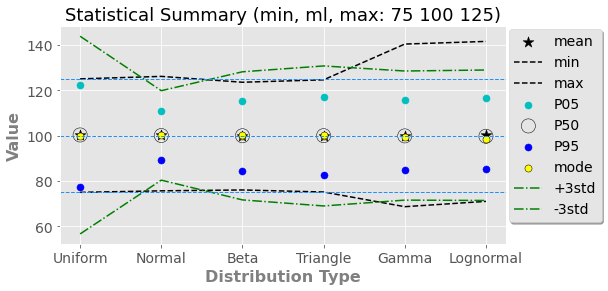

In [21]:
#df.reset_index(inplace=True)
fig = plt.figure(figsize=(8,4))
plt.scatter(df_stats['DisType'], df_stats['mean'], marker ='*', s= 130, c='k', label='mean')
#plt.scatter(df_stats['DisType'], df_stats['median'], marker ='s', s= 100,alpha = .5, label='median')
plt.plot(df_stats['DisType'], df_stats['min'], c='k', ls='--', label='min')
plt.plot(df_stats['DisType'], df_stats['max'], c='k', ls='--', label='max')
plt.scatter(df_stats['DisType'], df_stats['P05'],  s= 50, c='c',label='P05')
plt.scatter(df_stats['DisType'], df_stats['P50'], s= 200, facecolor='none', edgecolor='k', label='P50')
plt.scatter(df_stats['DisType'], df_stats['P95'],  s= 50, c='b', facecolor='none', edgecolor='b', label='P95')
plt.scatter(df_mode['DisType'], df_mode['x'],  s= 50, facecolor='yellow', edgecolor='k', label='mode')
plt.plot(df_stats['DisType'], df_stats['mean']+(3*df_stats['std']), c='g', ls='-.', label='+3std')
plt.plot(df_stats['DisType'], df_stats['mean']-(3*df_stats['std']), c='g', ls='-.', label='-3std')
plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(.99, 1.02))
plt.title('Statistical Summary (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Distribution Type', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')

plt.axhline(y=min, color='dodgerblue', lw=1, linestyle='--')
plt.axhline(y=ml, color='dodgerblue', lw=1, linestyle='--')
plt.axhline(y=max, color='dodgerblue', lw=1, linestyle='--')
plt.show()

################################################# Change Directory and write files
# #os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# # print(os.path.abspath(os.curdir))

# fig.savefig('Stat Summary (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
################################################ End of save figure script

### Excedence Probability Comparison

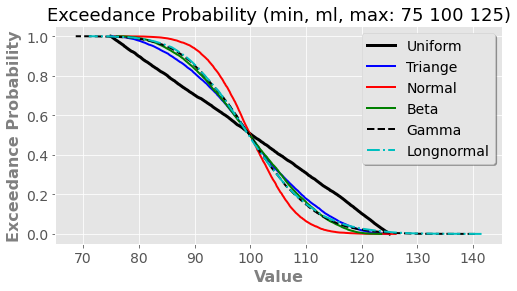

In [22]:
# Sort the numpy random values in decending
uvals[::-1].sort()
nvals[::-1].sort()
bvals[::-1].sort()
tvals[::-1].sort()
gvals[::-1].sort()
lnvals[::-1].sort()
# Combined numpy arrays into a datafame and add probability and excednce probability
df = pd.DataFrame({'uvals': uvals,'nvals': nvals,'bvals': bvals, 'tvals': tvals,'gvals': gvals,'lnvals': lnvals,})
df['prob']=1/size
df.sort_values(by='uvals', ascending=False, inplace=True)
df['Eprob']=df['prob'].cumsum()
pd.options.display.float_format = "{:,.4f}".format

fig = plt.figure(figsize=(8,4))
plt.plot(df['uvals'], df['Eprob'], c='k', lw=3, label='Uniform')
plt.plot(df['tvals'], df['Eprob'], c='b', lw=2, label='Triange')
plt.plot(df['nvals'], df['Eprob'], c='r', lw=2, label='Normal')
plt.plot(df['bvals'], df['Eprob'], c='g', lw=2, label='Beta')
plt.plot(df['gvals'], df['Eprob'], c='k', lw=2, label='Gamma', ls='--')
plt.plot(df['lnvals'], df['Eprob'], c='c', lw=2, label='Longnormal', ls='-.')
plt.legend(fontsize=14, shadow=True)
plt.title('Exceedance Probability (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Exceedance Probability', fontsize =16, fontweight='bold', color='gray')
plt.show()

# ################################################# Change Directory and write files
# #os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# # print(os.path.abspath(os.curdir))

# fig.savefig('Exced Prob (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+').png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

### Box and Whisker Comparison Plots

ValueError: x and y must be the same size

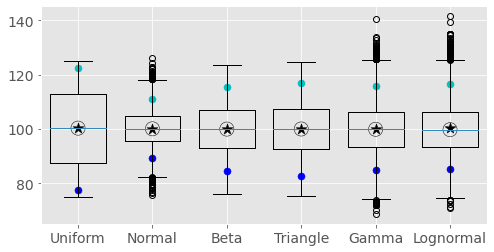

In [23]:

list=[1,2,3,4,5,6]
figdata=[uvals, nvals, bvals, tvals, gvals, lnvals]
fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75, notch=False) # patch_artist=True


plt.xticks([1, 2, 3, 4, 5, 6], ['Uniform','Normal','Beta','Triangle','Gamma','Lognormal'])
plt.scatter(list, df_stats['P05'],  s= 50, c='c',label='P05')
plt.scatter(list, df_stats['P50'], s= 200, facecolor='none', edgecolor='k', label='P50')
plt.scatter(list, df_stats['P95'],  s= 50, c='b', facecolor='none', edgecolor='b', label='P95')
plt.scatter(list, df_stats['mean'], marker ='*', s= 130, c='k', label='mean')
plt.scatter(list, df_mode['x'],  s= 50, facecolor='yellow', edgecolor='k', label='mode')
plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(.99, 1.02))

plt.title('PDF Comparison (min, ml, max: '+ str(min)+' '+str(ml)+' ' + str(max)+')', fontsize=18)
plt.xlabel('PDF Type', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')

plt.hlines(min, xmin=0, xmax=6, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(ml, xmin=0, xmax=6, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(max, xmin=0, xmax=6, color='dodgerblue', lw=1, linestyles='--')
plt.show()

# Methods for Creating Random Values
good reference: https://pynative.com/python-get-random-float-numbers/

In [ ]:
# Method 1: Generate an array of random intergers
import random
randomlist1 = []
divisor = 100                               # Change divisor to 100 to ouput fractions
for i in range(1,10):                      # Sets the number of integers to make
    n = random.randint(1,10) / divisor     # Sets the lower and upper number limits to generate
    randomlist1.append(n)
print(randomlist1)
print("Min and Max: ",np.min(randomlist1), np.max(randomlist1))

#Array of random floats in a range
randbetween=np.random.uniform(.01, .99, 10000)
print("Min and Max: ", np.min(randbetween), np.max(randbetween))

In [ ]:
# Method 2: Generate n random integers  between range(min, max))=
import random
randomlist1 = random.sample(range(0, 100), 10) # Create an array of random numbers
randomlist2 = random.sample(randomlist1, 2)    # Sample the array
#randomlist3 = random.sample(pert, 2)    # Sample the array
randomlist1

# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(7)
# generate some integers
randomlist4 = randint(10, 20, 100)

# Generate random numbers between 0 and 1
randfloat=np.random.rand(10000)
print("min and max:: ", np.min(randfloat), np.max(randfloat))
print("Random float between two values:", random.uniform(.00001, .99999))

In [ ]:
print(randomlist1), print(randomlist2)
print(randomlist4)